In [5]:
import socnavgym
import gymnasium as gym
from socnavgym.wrappers import DiscreteActions
from socnavgym.wrappers import CardinalActions
from rl.QLearning import *
from rl.MSR import *
from rl.SR import *
from rl.SF import *
from rl.DQN import *
from rl.DSR import *
from rl.SRQ import *
from rl.MSR import *
from rl.SRDec import *
from tqdm.auto import trange
import imageio
from utils.StateDiscretizer import *
from utils.TileCoder import *

In [6]:
env = gym.make("SocNavGym-v1", config="./configs/no_humans.yaml") 
env = DiscreteActions(env)

SEED = 5
EPISODES = 300

discretizer = StateDiscretizer(xy_bins=30, env=env, theta_bins=8)

In [7]:
learning_rate = [0.2, 0.1, 0.05, 0.01]

In [ ]:
rewards = []
length = []
for lr in learning_rate:
    agent = MSR(
            action_size=7,
            learning_rate_topo=lr,
            learning_rate_social=lr,
            r_learning_rate_topo=0.2,
            r_learning_rate_social=0.2,
            gamma=0.5, epsilon=0.05, discretizer=discretizer
        )

    rewards_sr = []
    length_sr = []
 
    for episode in trange(EPISODES):
        obs = env.reset(seed=SEED) 
        episodes_length, episodes_rewards = agent.act(env, obs, upd_social=True)
        length_sr.append(episodes_length)
        rewards_sr.append(episodes_rewards)
    
    rewards.append(rewards_sr)
    length.append(length_sr)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

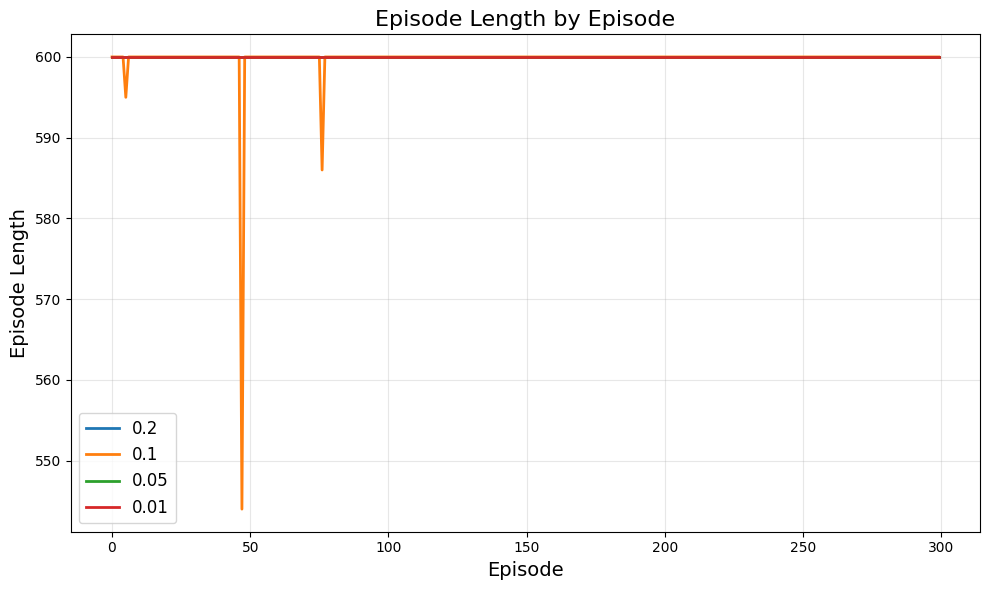

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(length[0],  linewidth=2, label=learning_rate[0])
ax.plot(length[1],  linewidth=2, label=learning_rate[1])
ax.plot(length[2],  linewidth=2, label=learning_rate[2])
ax.plot(length[3],  linewidth=2, label=learning_rate[3])

ax.set_title("Episode Length by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Episode Length", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
r_learning_rate = [0.5, 0.4, 0.2, 0.1]

In [ ]:
rewards = []
length = []
for lr in r_learning_rate:
    agent = MSR(
            action_size=7,
            learning_rate_topo=0.4,
            learning_rate_social=0.4,
            r_learning_rate_topo=lr,
            r_learning_rate_social=lr,
            gamma=0.5, epsilon=0.05, discretizer=discretizer
        )


    rewards_sr = []
    length_sr = []

    for episode in trange(EPISODES):
        obs = env.reset(seed=SEED)
        episodes_length, episodes_rewards = agent.act(env, obs,upd_social=True)
        length_sr.append(episodes_length)
        rewards_sr.append(episodes_rewards)
    
    rewards.append(rewards_sr)
    length.append(length_sr)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

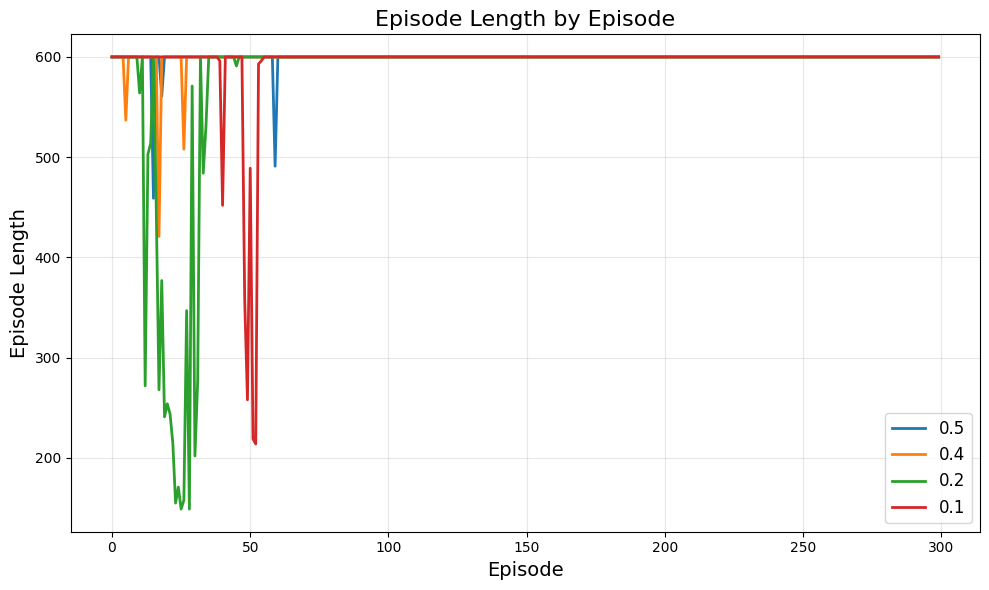

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(length[0],  linewidth=2, label=r_learning_rate[0])
ax.plot(length[1],  linewidth=2, label=r_learning_rate[1])
ax.plot(length[2],  linewidth=2, label=r_learning_rate[2])
ax.plot(length[3],  linewidth=2, label=r_learning_rate[3])

ax.set_title("Episode Length by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Episode Length", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [24]:
gammas = [0.7, 0.6, 0.5, 0.4]

In [25]:
rewards = []
length = []
for gamma in gammas:
    agent = MSR(
        action_size=7,
        learning_rate_topo=0.4,
        learning_rate_social=0.4,
        r_learning_rate_topo=0.2,
        r_learning_rate_social=0.2,
        gamma=gamma, epsilon=0.05, discretizer=discretizer
    )

    rewards_sr = []
    length_sr = []

    for episode in trange(EPISODES):
        obs = env.reset(seed=SEED)
        episodes_length, episodes_rewards = agent.act(env, obs)
        length_sr.append(episodes_length)
        rewards_sr.append(episodes_rewards)
    
    rewards.append(rewards_sr)
    length.append(length_sr)

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

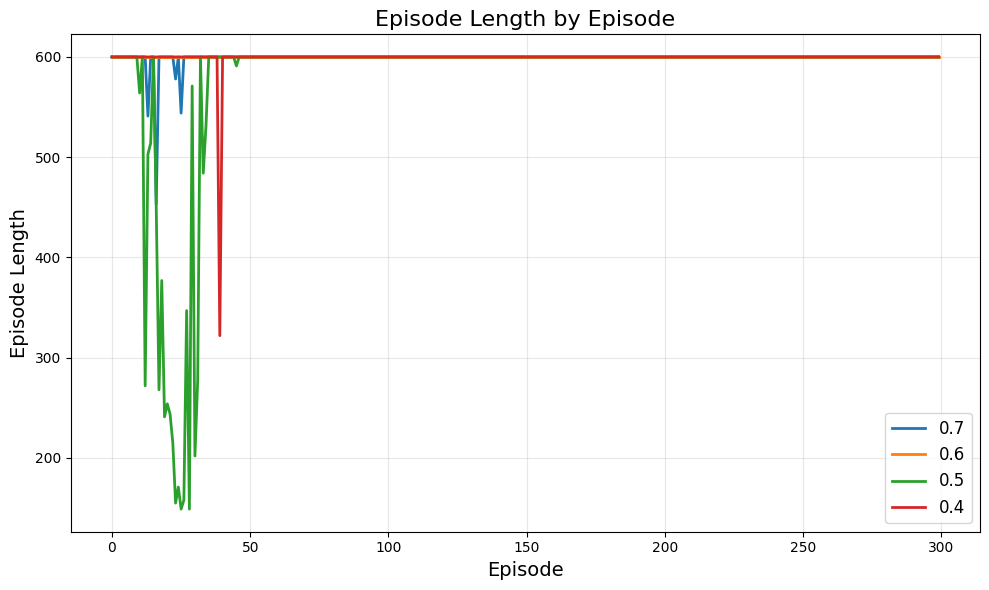

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(length[0],  linewidth=2, label=gammas[0])
ax.plot(length[1],  linewidth=2, label=gammas[1])
ax.plot(length[2],  linewidth=2, label=gammas[2])
ax.plot(length[3],  linewidth=2, label=gammas[3])

ax.set_title("Episode Length by Episode", fontsize=16)
ax.set_xlabel("Episode", fontsize=14)
ax.set_ylabel("Episode Length", fontsize=14)

ax.grid(True, alpha=0.3)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()